# Taller 4

## Métodos Computacionales 1 2022-10

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de bloque neon. El archivo debe ser nombrado ApellidoNombre_ApellidoNombre_Taller4.ipynb, para las partes analíticas el archivo debe ser **.pdf** ApellidoNombre_ApellidoNombre_Taller4.pdf. **El archivo debe poder correr en el binder de la magistral** 

Si un ejercicio demora **más de 10 segundos** en correr se considerará **incorrecto**.

No modifique el cuaderno, ni los casos de prueba, puede correr los casos de prueba pero no modificarlos.

**Entrega: Miercoles 6 de Abril 11:59 pm**

## Librerias

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import Algoritmosnumericos as Alg
plt.style.use('dark_background')
%matplotlib widget
%config InlineBackend.figure_format = 'retina'

## Problema 1

Considere los siguientes puntos

```
x = [1., 2., 3., 4., 5.]
y = [1.20,  0.31, 3.92, 3.78, 4.47]
```

A partir del metodo de  [regresion matricial](https://github.com/diegour1/MetodosComputacionales1/blob/main/Notebooks/08%20-%20fit_lineal_y_solucion_sistema_de_ecuaciones.ipynb) visto en clase. Realice 4 regresiones de grado 0, 1, 2, 3, y 4. Gráfique los puntos junto con las regresiones. El gráfico se debe ver como se muestra a continuación. 

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales1/main/DataFiles/image7.png)

Debe implementar el método no puede usar librerias como `sklearn.linear_model.LinearRegression`.

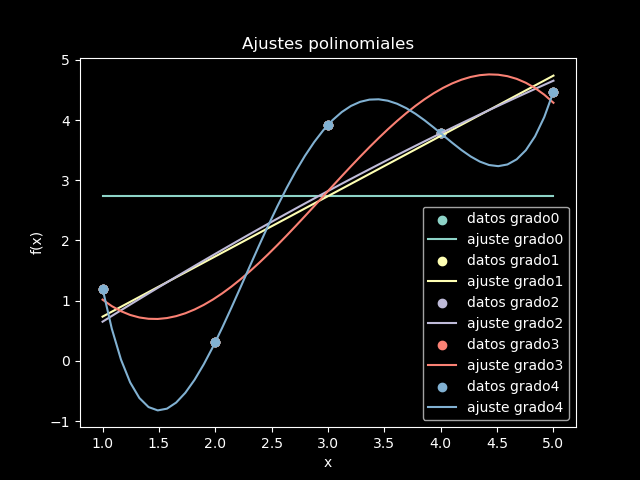

In [5]:
# tu codigo aqui
t, y, vacio = [1, 2, 3, 4, 5], [1.20, 0.31, 3.92, 3.78, 4.47], []
fig, ax = plt.subplots()
for i in range(5):
    vacio.append(1)
    Alg.dibujo_reg(t,y,i,vacio,0,0,'Ajustes polinomiales','x','f(x)',
                   'grado'+str(i),ax)

## Problema 2

Considere una cadena larga de resistencias como se muestra en la figura:

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales1/main/DataFiles/image8.png)

Todos los resitores tienen las misma resistencia $R$. El voltage en la parte superior izquierda del sistema es $V_+ = 5 \text{V}$. El problema consiste en obtener los voltajes $V_1, \ldots, V_N$ de los puntos internos del circuito. 

a) Usando la ley de Ohm y la ley de corrientes de Kirchoff, la cual dice que la corriente total que fluye hacia afuera o hacia adentro de cada nodo del circuito es cero. Muestre que los voltajes $V_1, \ldots, V_N$ cumplen con las siguientes ecuaciones.

$$3V_1 − V_2 − V_3 = V_+$$
$$− V_1 + 4V_2 − V_3 − V_4 = V_+,$$
$$\vdots$$
$$− V_{i − 2} − V_{i − 1} + 4V_i − V_{i + 1} − V_{i + 2} = 0,$$
$$\vdots$$
$$− V_{N − 3} − V_{N − 2}+ 4V_{N − 1} − V_N = 0,$$
$$− V_{N − 2} − V_{N − 1} + 3V_N = 0.$$

b) Escriba las ecuaciones de la forma $A\vec{x} = \vec{b}$ encuentre los valores de la matriz $A$ y del vector $\vec{b}$, para $N=6$. Imprima estos dos resultados en el notebook.

c) Escriba un programa que resuelva los valores de $V_i$ cuando $N=6$ es decir 6 nodos internos. Guarde e imprima los valores en el vector $\vec{x}$.

d) Encuentre la resitencia total $R_{(N=6)} = \alpha R$, para la red $N=6$, donde $\alpha$ es un constante, imprima el valor de $\alpha$.

In [6]:
# Tu codigo aqui
A = [[3, -1, -1, 0, 0, 0],
     [-1, 4, -1, -1, 0, 0],
     [-1, -1, 4, -1, -1, 0],
     [0, -1, -1, 4, -1, -1], 
     [0, 0, -1, -1, 4, -1],
     [0, 0, 0, -1, -1, 3] ]
b = [[5, 5, 0, 0, 0, 0]]
x=Alg.producto(Alg.inversa(A),b)




$$R_{T}=\frac{V_{T}}{I_{T}} = \frac{V +}{\frac{V_{+} - V_{1}}{R} + \frac{V_{+} - V_{2}}{R}}$$
$$R_{T}=(\frac{V_{+}}{2V_{+}-V_{1}-V_{2}} )R$$

In [7]:
# codigo para la verificacion
print(20*'-')
Alg.print_matriz(A)
print(20*'-')
print(Alg.print_matriz(b))
print(20*'-')
print(Alg.print_matriz(x))
print(20*'-')



--------------------
[3, -1, -1, 0, 0, 0]
[-1, 4, -1, -1, 0, 0]
[-1, -1, 4, -1, -1, 0]
[0, -1, -1, 4, -1, -1]
[0, 0, -1, -1, 4, -1]
[0, 0, 0, -1, -1, 3]
--------------------
[5, 5, 0, 0, 0, 0]
 
--------------------
[3.72549, 3.431373, 2.745098, 2.254902, 1.568627, 1.27451]
 
--------------------


In [8]:
# Tu codigo aqui
alpha = (5/(10-x[0][0]-x[0][1]))

In [9]:
# codigo para la verificacion
print(alpha)

1.7586206896551726


## Problema 3

Considere dos bloques de masa $m_1$ y $m_2$, el bloque $m_1$ empieza con una velocidad $v_1 = - 1 \text{ m/s}$ el bloque $m_2$ empieza en reposo. Primero el bloque 1 choca con el bloque 2 de forma elastica, luego el bloque 2 choca elasticamente contra la pared, y luego se dirige el bloque 2 de nuevo hacia el bloque 1 para chocar de nuevo elasticamente. El bloque 2 choca elasticamente varias veces contra la pared y contra el bloque 1 y se cuentan el número de choques elasticos totales, hasta que los bloques dejan de chocar.

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales1/main/DataFiles/image9.png)

Si los bloques 1 y 2 tienen en cierto momento una velocidad $v_{1i}$ y $v_{2i}$ la velocidad después del choque elastico están dados por, 

$$
v_{1f} = v_{1i}\Big(\frac{m_1-m_2}{m_1+m_2}\Big) + v_{2i}\Big(\frac{2m_2}{m_1+m_2}\Big)
$$

$$
v_{2f} = v_{1i}\Big(\frac{2m_1}{m_1+m_2}\Big) + v_{2i}\Big(\frac{m_2-m_1}{m_1+m_2}\Big)
$$

Cree la función `num_collisions(m1, m2)` que reciba las masas $m_1$ y $m_2$ de los bloques 1 y 2 respectivamente, y retorne el número de choques totales `count`, la velocidad inicial del bloque 1 es $v_1 = -1 \text{ m/s}$ y el bloque 2 empieza en reposo.

Pista: Escriba las ecuaciones anteriores de forma matricial. Más detalles del problema se pueden encontrar en este [link](https://www.youtube.com/watch?v=HEfHFsfGXjs&ab_channel=3Blue1Brown).

Para pensar (no para hacer): ¿ Cómo resolvería el problema analíticamente ? (Sin ver las soluciones en internet)

In [10]:
def num_collisions(m1, m2):
    count = 0
    a, b = (m1-m2)/(m1+m2), (2*m1)/(m1+m2)
    c, d = (2*m2)/(m1+m2), (m2-m1)/(m1+m2)
    A = Alg.matriz_vacia(2, 2)
    A = Alg.remplazarcolumnaj(A, 0, [[a, b]])
    A = Alg.remplazarcolumnaj(A, 1, [[c, d]])
    v_s = [[-1, 0]] # velocidades iniciales
    while True:
        v_s = Alg.producto(A,v_s)
        count += 1
        if (v_s[0][1] >= 0 and v_s[0][0] >= v_s[0][1]):
            break
        v_s[0][1] = -v_s[0][1]
        count += 1
        if (v_s[0][1] >= 0 and v_s[0][0] >= v_s[0][1]):
            break
    return count

In [11]:
# codigo para la verificacion
print(num_collisions(1, 1))
print(num_collisions(10, 1))
print(num_collisions(100, 1))
print(num_collisions(1000, 1))
print(num_collisions(10000, 1))
print(num_collisions(100000, 1))
print(num_collisions(1000000, 1))
print(num_collisions(10000000, 1))
print(num_collisions(100000000, 1))

3
10
31
99
314
993
3141
9934
31415


## Bono 0.5: 

Obtenga las ecuaciones del choque elastico del problema 3.

**Demostración, ecuaciones elásticas:**

En estos choques se conserva la energía cinética y el momento lineal por ende tenemos las siguientes ecuaciones:

$$m _{1}v _{10}+m _{2} v _{20}=m _{1}v _{1f}+m _{2} v _{2f}$$
$$\frac{1}{2}m _{1}v _{10}^{2} +\frac{1}{2}m _{2}v _{20}^{2}=\frac{1}{2}mv _{1f}^{2} +\frac{1}{2}mv _{2f}^{2}$$
la ecuación $(12)$ equivale a las siguientes ecuaciones:

$$m _{1}v _{10}^{2} +m _{2}v _{20}^{2}=m _{1}v _{1f}^{2} +m _{2}v _{2f}^{2}$$


$$m _{1}v _{10}^{2} +m _{2}v _{20}^{2}=m_{1}v _{1f}^{2} +m_{2}v _{2f}^{2}$$


$$m _{1}v _{10}^{2} -m _{1}v _{1f}^{2}=m_{2}v _{2f}^{2}-m _{2}v _{20}^{2}$$

$$m1(v _{10}-v_{1f})(v _{10}-v_{1f})=m2(v _{2f}-v_{20})(v _{2f}+v_{20})$$

Pero la ecuación $(11)$ equivale a:

$$m1(v _{10}-v_{1f})=m2(v _{2f}-v_{20})$$

lo que implica que:
$$(v _{10}+v_{1f})=(v _{2f}+v_{20})$$

Rescribiendo $(11)$ y $(18)$ tenemos el siguiente sistema de ecuaciones $2x2$:

$$v _{1f}-v_{2f}=v _{20}-v_{10}$$
$$m _{1}v _{1f}+m _{2} v _{2f}=m _{1}v _{10}+m _{2} v _{20}$$

Escribiendo de forma matricial:

$$\begin{bmatrix} 
	1 & -1 & \\
	m1 & m2 \\
	\end{bmatrix}
    \begin{bmatrix} 
	v _{1f} \\
	v _{2f}  \\
	\end{bmatrix}=\begin{bmatrix} 
	v _{20}-v_{10}  \\
	m1v _{10}+m2v_{20} \\
	\end{bmatrix}$$

esta ecuación es de la forma $Ax=b$ cuya solución es $x=\frac{1}{det(A)}adj(A)b$, queda entonces:

$$det(A)=m1+m2$$

$$Adj(A)=\begin{bmatrix} 
	m2 & 1 & \\
	-m1 & 1 \\
	\end{bmatrix}$$
    
Remplazando $(22)$ y $(23)$ en $(21)$

$$\begin{bmatrix} 
	v _{1f} \\
	v _{2f}  \\\end{bmatrix}=(\frac{1}{m1+m2})
    \begin{bmatrix} 
	m2 & 1 & \\
	-m1 & 1 \\
	\end{bmatrix}
    \begin{bmatrix} 
	v _{20}-v_{10}  \\
	m1v _{10}+m2v_{20} \\
	\end{bmatrix}$$
    
$=(\frac{1}{m1+m2})
   \begin{bmatrix} 
	m2(v_{20}-v_{10})+(m1v _{10}+m2v_{20}) \\
	-m1(v_{20}-v_{10})+(m1v _{10}+m2v_{20}) \\
	\end{bmatrix}$
    
$=(\frac{1}{m1+m2})
   \begin{bmatrix} 
	m1v_{10}-m2v_{10}+m2v_{20}+m2v_{20} \\
	m1v_{10}+m1v_{10}+m2v_{20}-m1v_{20} \\
	\end{bmatrix}$

    
Factorizando las velocidades Reacomodando y expresando la solución de forma no matricial nos queda lo deseado:

$$
v_{1f} = v_{1i}\Big(\frac{m_1-m_2}{m_1+m_2}\Big) + v_{2i}\Big(\frac{2m_2}{m_1+m_2}\Big)
$$

$$
v_{2f} = v_{1i}\Big(\frac{2m_1}{m_1+m_2}\Big) + v_{2i}\Big(\frac{m_2-m_1}{m_1+m_2}\Big)
$$

$Q.E.D$

















